# Data wrangling Project 2
This file is used for exploring and refining the datasets.

Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from IPython.display import display
warnings.filterwarnings('ignore')

# Loading the datasets

Just with .txt files, without converting it to csv (works perfectly fine)

In [8]:
# Defining the file path 
file_path_client = 'Datasets/Datasets_raw/df_final_experiment_clients.txt'
file_path_fwd1 = 'Datasets/Datasets_raw/df_final_web_data_pt_1.txt'
file_path_fwd2 = 'Datasets/Datasets_raw/df_final_web_data_pt_2.txt'

# Defining the file path for the demo set
file_path_demo = 'Datasets/Datasets_raw/df_final_demo.txt'

# Loading the CSV files into DataFrames
df_client = pd.read_csv(file_path_client)
df_fwd1 = pd.read_csv(file_path_fwd1)
df_fwd2 = pd.read_csv(file_path_fwd2)

# Loading the demo file into Dataframe
df_demo = pd.read_csv(file_path_demo)

## Naming of the dataframes 
Here are all the information about the datasets that are merged together
- df_web = web data 1 and web data 2 merged together 
- df_web_ec = experiment clients data + web d1 + web df2
- df_merged = df start + df demo 

# Exploring the datasets

### Exploring the webdataset  part 1 

In [12]:
# Here I am checking the columns of the dataframes if the first web data file
df_fwd1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [13]:
df_fwd1.info()
df_fwd1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


### Exploring the webdataset  part 2

In [15]:
# Here I am checking the columns and information of the second web data file
df_fwd2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [16]:
df_fwd2.info()
df_fwd2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB


,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


### Exploring the dataset experiment client 

In [18]:
# Reviewing the dataset client
df_client

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [19]:
# Here I am checking the columns of the dataframaes of the client file
print(df_client.columns.tolist())

['client_id', 'Variation']


In [20]:
df_client.info()
df_client.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [21]:
df_client.columns

Index(['client_id', 'Variation'], dtype='object')

Checking for nulls, shapes and types from all datasets

In [23]:
# For each DataFrame
for name, df in [('df_demo', df_demo), ('df_client', df_client), ('df_fwd1', df_fwd1), ('df_fwd2', df_fwd2)]:
    print(f"\n===== {name} =====")
    print("\nShape:", df.shape)
    print("\nColumns and Data Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nPreview:\n", df.head(3))


===== df_demo =====

Shape: (70609, 9)

Columns and Data Types:
 client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

Missing Values:
 client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

Preview:
    client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   

         bal  calls_6_mnth  logons_6_mnth  
0   45105.30           6.0            9.0  
1  110860.30          

Merging the file web datasets of 1 and 2 together 

In [25]:
# Merging here the two dataframes of the web data files
df_web = pd.concat([df_fwd1, df_fwd2], ignore_index=True)
df_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [26]:
# Here I am saving the two dataframes of the web data files into one file
df_web.to_csv('Datasets/Datasets_raw/df_web_merged.csv', index=False)

Merging web datasets 1 + 2 and with experiment dataset

In [28]:
# Now I want to merge the web data frames with the experiment client data frame
df_web_ec = pd.merge(df_web, df_client, on='client_id', how='right')
df_web_ec # Reviewing the dataset 

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,NaN
449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,NaN
449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,NaN
449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,NaN


In [29]:
# I am saving the dataframes of the web data files with the experiment clients into one file
df_web_ec.to_csv('Datasets/Datasets_raw/df_web_ec.csv', index=False)

In [30]:
print("Total clients in experiment:", df_client['client_id'].nunique()) # Checking here the unique total of the dataset for clients
print("Unique clients in merged web+experiment data:", df_web_ec['client_id'].nunique()) # Checking here the total of the dataset for the merged web data + experiment data files
# The amount is the same so there is no loss of data 

Total clients in experiment: 70609
Unique clients in merged web+experiment data: 70609


In [31]:
df_web_ec.isnull().sum() # Checking to see if we have any nulls.

client_id            0
visitor_id           0
visit_id             0
process_step         0
date_time            0
Variation       128522
dtype: int64

In [32]:
df_web_ec[df_web_ec['date_time'].isnull()].shape

(0, 6)

In [33]:
df_web_ec[df_web_ec['date_time'].isnull()] # Checking WHERE the nulls are

,client_id,visitor_id,visit_id,process_step,date_time,Variation


In [34]:
null_indices = df_web_ec[df_web_ec['date_time'].isnull()].index   # there seems 0 nulls 
print(null_indices)   

Index([], dtype='int64')


Checking group sizes

In [36]:
df_web_ec.columns # Checking all the columns of the dataset

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'Variation'],
      dtype='object')

In [37]:
df_web_ec['Variation'].unique() # reviewing how many inputs there are in the coluymn variation

array(['Test', 'Control', nan], dtype=object)

In [38]:
df_web_ec[df_web_ec['Variation'].isnull()] # reviewing how many Nan's we have 

,client_id,visitor_id,visit_id,process_step,date_time,Variation
321309,5459747,927506343_21566395546,126601512_42206463738_739012,confirm,2017-05-22 12:14:45,NaN
321310,5459747,927506343_21566395546,126601512_42206463738_739012,step_3,2017-05-22 12:14:27,NaN
321311,5459747,927506343_21566395546,126601512_42206463738_739012,step_2,2017-05-22 12:14:13,NaN
321312,5459747,927506343_21566395546,126601512_42206463738_739012,step_1,2017-05-22 12:13:50,NaN
321313,5459747,927506343_21566395546,126601512_42206463738_739012,start,2017-05-22 12:13:43,NaN
...,...,...,...,...,...,...
449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,NaN
449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,NaN
449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,NaN
449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,NaN


In [39]:
# Replacing all the Nan of the column 'Variation' into unknown
df_web_ec['Variation'] = df_web_ec['Variation'].fillna('Unknown')

In [40]:
df_web_ec['Variation'].unique()

array(['Test', 'Control', 'Unknown'], dtype=object)

In [41]:
df_web_ec['Variation'].value_counts(normalize=True) # calculating the proportion (relative frequency) of each unique value in the Variation column.

Variation
Test       0.395364
Control    0.318924
Unknown    0.285712
Name: proportion, dtype: float64

Exploring the full funnel process steps

In [43]:
df_web_ec['process_step'].value_counts()

process_step
start      145588
step_1      95896
step_2      79571
step_3      68217
confirm     60559
Name: count, dtype: int64

In [44]:
step_counts = df_web_ec.groupby(['Variation', 'process_step']).size().unstack().fillna(0)
step_counts

process_step,confirm,start,step_1,step_2,step_3
Variation,,,,,
Control,17505,47608,29668,25886,22795
Test,25722,56474,38768,30989,25894
Unknown,17332,41506,27460,22696,19528


Checking how many clients reached 'confirm'

In [46]:
# Here I am assing new variables to review how many confirmed and review if its either with the test or control group
df_confirm = df_web_ec[df_web_ec['process_step'] == 'confirm']
conversion_rates = df_confirm['Variation'].value_counts(normalize=True)
conversion_rates

Variation
Test       0.424743
Control    0.289057
Unknown    0.286200
Name: proportion, dtype: float64

Confirmed / converted per variation group
Variation
Test       42,5%
Control    28,9%
Unknown    28,6%

In [48]:
# these are just raw counts 
df_confirm['Variation'].value_counts()

Variation
Test       25722
Control    17505
Unknown    17332
Name: count, dtype: int64

Completion rate per client

In [50]:
# Dropping here any client ids that are duplicated 
df_confirm_unique = df_confirm.drop_duplicates(subset=['client_id'])
df_confirm_unique['Variation'].value_counts(normalize=True)

Variation
Test       0.390941
Control    0.322887
Unknown    0.286172
Name: proportion, dtype: float64

### Plots 

In [53]:
def plot_funnel_analysis(df_web_ec):
    '''
    Plots funnel charts and drop-off percentages for Control vs Test groups.
    '''
    # Step 1: Counting process steps per group
    step_counts = df_web_ec.groupby(['Variation', 'process_step']).size().unstack().fillna(0)

    # Step 2: Plot funnel steps
    step_counts.T.plot(kind='bar', figsize=(10, 6))
    plt.title("Number of Clients at Each Process Step")
    plt.xlabel("Process Step")
    plt.ylabel("Number of Clients")
    plt.xticks(rotation=0)
    plt.legend(title="Group")
    plt.tight_layout()
    plt.show()

    # Step 3: Calculate drop-off percentages
    dropoff = step_counts.copy()
    steps = step_counts.columns.tolist()
    for i in range(1, len(steps)):
        prev_col = steps[i - 1]
        curr_col = steps[i]
        dropoff[curr_col] = 1 - (step_counts[curr_col] / step_counts[prev_col])

    # Step 4: Plot drop-off %
    (dropoff.drop(columns=[steps[0]]).T * 100).plot(kind='bar', figsize=(10, 6))
    plt.title("Drop-off Percentage Between Steps")
    plt.xlabel("Process Step")
    plt.ylabel("Drop-off (%)")
    plt.xticks(rotation=0)
    plt.legend(title="Group")
    plt.tight_layout()
    plt.show()
   

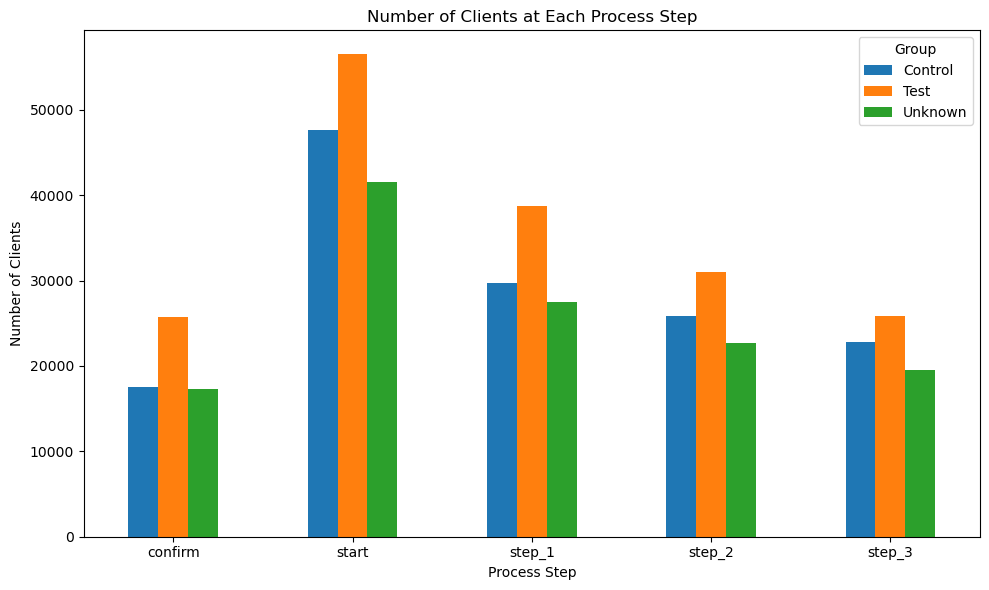

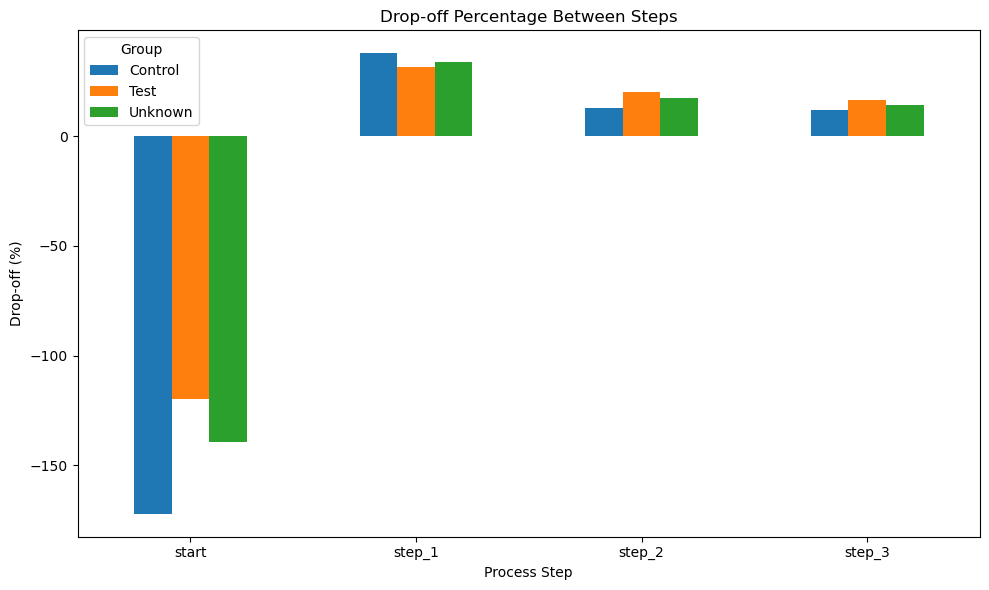

In [54]:
plot_funnel_analysis(df_web_ec)

In [55]:
# Converting date_time to datetime object
df_web_ec['date_time'] = pd.to_datetime(df_web_ec['date_time'])

# Sorting by client, visit and time.
df_web_ec = df_web_ec.sort_values(by=['client_id', 'visit_id', 'date_time'])

In [56]:
# Saving the dataset to a csv file
df_web_ec.to_csv('Datasets/Datasets_clean/df_web_ec.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'Datasets\Datasets_clean'

In [ ]:
df_web_ec

In [57]:
print(df_web_ec.shape) # number of rows and columns
print(df_web_ec.head()) # first 5 rows
print(df_web_ec.isnull().sum()) # number of missing values in each column

(449831, 6)
        client_id             visitor_id                      visit_id  \
374121        169  201385055_71273495308  749567106_99161211863_557568   
374120        169  201385055_71273495308  749567106_99161211863_557568   
374119        169  201385055_71273495308  749567106_99161211863_557568   
374118        169  201385055_71273495308  749567106_99161211863_557568   
374117        169  201385055_71273495308  749567106_99161211863_557568   

       process_step           date_time Variation  
374121        start 2017-04-12 20:19:36   Unknown  
374120       step_1 2017-04-12 20:19:45   Unknown  
374119       step_2 2017-04-12 20:20:31   Unknown  
374118       step_3 2017-04-12 20:22:05   Unknown  
374117      confirm 2017-04-12 20:23:09   Unknown  
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
Variation       0
dtype: int64


In [59]:
print(df_web_ec.columns.tolist())

['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time', 'Variation']


In [61]:
# Checking for duplicates
duplicates = df_web_ec[df_web_ec.duplicated()]
print("Total duplicated rows:", len(duplicates))

Total duplicated rows: 5934


In [63]:
def remove_duplicates(df):
    '''REMOVING DUPLICATES, 'start' and 'confirm' steps, only keeping the last each visit'''

    df = df_web_ec.copy()

    df_not_started = df[df['process_step'] != 'start']
    filter_start = df[df['process_step'] == 'start'].drop_duplicates(subset=['visit_id'], keep='last')
    df = pd.concat([df_not_started, filter_start])
    df = df.sort_values(by=['client_id', 'visit_id', 'date_time'])

    not_confirm_df = df[df['process_step'] != 'confirm']
    filter_confirm = df[df['process_step'] == 'confirm'].drop_duplicates(subset=['visit_id'], keep='last')

    df = pd.concat([not_confirm_df, filter_confirm])
    df = df.sort_values(by=['client_id', 'visit_id', 'date_time'])
    return(df)

In [65]:
df_web_ec_cleaned = remove_duplicates(df_web_ec)
df_web_ec_cleaned

,client_id,visitor_id,visit_id,process_step,date_time,Variation
374121,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,Unknown
374120,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,Unknown
374119,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,Unknown
374118,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,Unknown
374117,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,Unknown
...,...,...,...,...,...,...
359300,9999839,948322592_28990736246,715530422_68620416793_515645,start,2017-03-29 12:11:32,Unknown
359299,9999839,948322592_28990736246,715530422_68620416793_515645,step_1,2017-03-29 12:11:35,Unknown
359298,9999839,948322592_28990736246,715530422_68620416793_515645,step_2,2017-03-29 12:11:50,Unknown
359297,9999839,948322592_28990736246,715530422_68620416793_515645,step_3,2017-03-29 12:12:28,Unknown


In [67]:
# Reviewing the df for duplicates
duplicates2 = df[df.duplicated()]
print("Total duplicated rows:", len(duplicates))

Total duplicated rows: 5934


In [69]:
# Saving the dataset to a csv file
df_web_ec_cleaned.to_csv('Datasets/Datasets_clean/df_web_ec_cleaned.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'Datasets\Datasets_clean'

Checking df_demo dataset

In [71]:
df_demo.info()
df_demo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [73]:
#Who are the primary clients using this online process?

# Filter for rows where process_step is 'start'
df_start = df_web_ec_cleaned[df_web_ec_cleaned['process_step'].str.lower() == 'start']

# Sort the result by date_time in ascending order
df_sorted = df_start.sort_values(by='date_time', ascending=True)

# Display only client_id and date_time (optional: include more columns if needed)
result = df_sorted[['client_id', 'date_time']]

print(result)

        client_id           date_time
46460     7179755 2017-03-15 00:19:28
104052    4192640 2017-03-15 00:44:38
137482    6752370 2017-03-15 05:43:13
274114    9584408 2017-03-15 06:14:28
228151    2685910 2017-03-15 07:13:47
...           ...                 ...
343771    6506786 2017-06-20 23:28:30
324228    6868690 2017-06-20 23:32:41
337003    2142847 2017-06-20 23:35:24
432569    8295888 2017-06-20 23:43:06
195002    6187864 2017-06-20 23:56:17

[89374 rows x 2 columns]


In [75]:
# Save to CSV
result.to_csv('Datasets/Datasets_clean/clients_started_process.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'Datasets\Datasets_clean'

In [77]:
#Are the primary clients younger or older, new or long-standing?

# Load the original DataFrames
df_start = pd.read_csv('Datasets/Datasets_clean/clients_started_process.csv')
df_demo = pd.read_csv('Datasets/Datasets_raw/df_final_demo.txt')

# Merge df start with df demo dataset on 'client_id'
df_merged = pd.merge(df_start, df_demo[['client_id', 'clnt_tenure_mnth', 'clnt_age']], on='client_id', how='left')

# Save the final DataFrame
df_merged.to_csv('Datasets/Datasets_clean/clients_started_process_enriched.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/Datasets_clean/clients_started_process.csv'

In [79]:
df_merged.head() # reviewing dataset

NameError: name 'df_merged' is not defined

In [81]:
# Load the enriched DataFrame
df_enriched = pd.read_csv('Datasets/Datasets_clean/clients_started_process_enriched.csv')

# Sort by 'clnt_tenure_mnth' in descending order
df_sorted = df_enriched.sort_values(by='clnt_tenure_mnth', ascending=False)

# Save the sorted DataFrame
df_sorted.to_csv('Datasets/Datasets_clean/clients_started_process_enriched_sorted.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/Datasets_clean/clients_started_process_enriched.csv'

In [ ]:
df_sorted.head()

In [83]:
# Load the sorted enriched data
df = pd.read_csv('Datasets/Datasets_clean/clients_started_process_enriched_sorted.csv')

# Set Seaborn style
sns.set(style='whitegrid')

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='clnt_age', y='clnt_tenure_mnth', alpha=0.6)

plt.title('Client Tenure (Months) vs Client Age')
plt.xlabel('Client Age')
plt.ylabel('Client Tenure (Months)')
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/Datasets_clean/clients_started_process_enriched_sorted.csv'

KeyError: 'clnt_tenure_mnth'

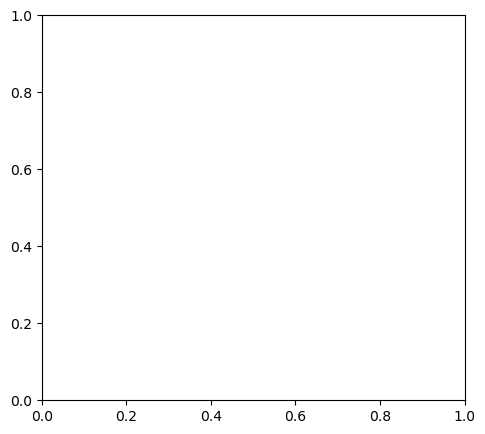

In [85]:
# Histogram of clnt_tenure_mnth
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['clnt_tenure_mnth'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Client Tenure (Months)')
plt.xlabel('Tenure (Months)')

# Histogram of clnt_age
plt.subplot(1, 2, 2)
sns.histplot(df['clnt_age'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Client Age')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

In [ ]:
# Load the dataset
df = pd.read_csv('Datasets/Datasets_clean/clients_started_process_enriched_sorted.csv')

# Select the columns of interest
cols = ['clnt_age', 'clnt_tenure_mnth']

# Calculate statistics
summary_stats = {
    'Mean': df[cols].mean(),
    'Standard Deviation': df[cols].std(),
    'Median': df[cols].median(),
    'Mode': df[cols].mode().iloc[0]  # Take first mode if multiple
}

# Convert to a DataFrame for easy viewing
stats_df = pd.DataFrame(summary_stats)
print(stats_df)

In [ ]:
# Load the dataset
df_demo = pd.read_csv('Datasets/Datasets_raw/df_final_demo.txt')

# Select the columns of interest
cols = ['clnt_age', 'clnt_tenure_mnth']

# Calculate statistics
summary_stats = {
    'Mean': df_demo[cols].mean(),
    'Standard Deviation': df_demo[cols].std(),
    'Median': df_demo[cols].median(),
    'Mode': df_demo[cols].mode().iloc[0]  # Take first mode if multiple
}

# Convert to a DataFrame for easy viewing
stats_demo = pd.DataFrame(summary_stats)
print(stats_demo)

# Questions

**Hypothesis Testing**
- Completion Rate: The proportion of users who reach the final ‘confirm’ step.
- Time Spent on Each Step: The average duration users spend on each step.
- Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.
- Based on the chosen KPIs, how does the new design’s performance compare to the old one?

- You are required to carry out another analysis, ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold.
- You might want to test whether the average age of clients engaging with the new process is the same as those engaging with the old process
- You might want to test if the average client tenure (how long they’ve been with Vanguard) of those engaging with the new process is the same as those engaging with the old process
- You might want to test if there are gender differences that affect engaging with the new or old process

**Design Effectiveness**
- Was the experiment well-structured?
- Were clients randomly and equally divided between the old and new designs?
- Were there any biases?

**Duration Assessment**
- Was the timeframe of the experiment (from 3/15/2017 to 6/20/2017) adequate to gather meaningful data and insights?

**Additional Data Needs**
- What other data, if available, could enhance the analysis?

**Bonus: Additional Tasks (Optional)**

Client Behavior Analysis
Interaction Patterns:
- How do clients navigate through the old versus the new digital process? Do they follow similar steps or diverge at certain points?
- Consider another hypothesis. Investigate if there’s a difference in the number of actions (steps) taken by users between the Test and Control groups.

Power and Effect Size
- Calculate the effect size and post-hoc power for the first test: the new design (Test group) had a higher completion rate compared to the old design (Control group), the hypothesis test checked if this difference was statistically significant.
- Let’s assume we are in the phase of designing the experiment for the same hypothesis test. Do Power Analysis to calculate the minimum sample size for an experiment.

Streamlit
- Add Streamlit to your project to achieve Customization and Real-time Analysis.


In [87]:
#Completion Rate: The proportion of users who reach the final ‘confirm’ step.

# Total number of unique clients who started the process
total_clients = df["client_id"].nunique()

# Number of unique clients who reached the 'confirm' step
clients_completed = df[df["process_step"] == "confirm"]["client_id"].nunique()

# Calculate completion rate
completion_rate = clients_completed / total_clients

# Display result as a percentage
print(f"Completion Rate: {completion_rate:.2%}")

Completion Rate: 66.61%


In [89]:
#TIME SPENT ON EACH STEP: The average duration users spend on each step

# Convert date_time to datetime format
df["date_time"] = pd.to_datetime(df["date_time"])

# Sort by client_id and date_time
df = df.sort_values(by=["client_id", "date_time"])

# Calculate the time spent per step (difference between current and next step for the same user)
df["time_spent"] = df.groupby("client_id")["date_time"].diff(-1).abs()

# Shift the process_step column up to associate the time with the current step
df["next_step"] = df.groupby("client_id")["process_step"].shift(-1)

# Drop rows where next_step is NaN (i.e., last step)
df = df.dropna(subset=["next_step", "time_spent"])

# Calculate average time spent per step
avg_time_per_step = df.groupby("process_step")["time_spent"].mean()

# Display results
print("Average Time Spent on Each Step:\n")
print(avg_time_per_step)

Average Time Spent on Each Step:

process_step
confirm   1 days 23:01:20.881331293
start     0 days 08:48:00.846029186
step_1    0 days 03:36:45.286626351
step_2    0 days 01:46:04.995128293
step_3    0 days 03:07:49.781279540
Name: time_spent, dtype: timedelta64[ns]


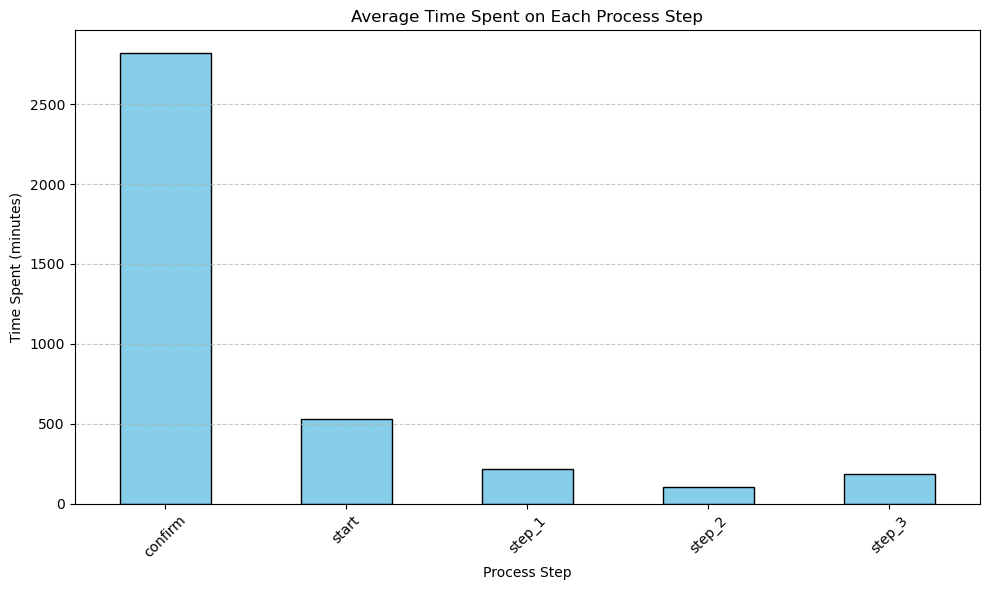

In [91]:
import matplotlib.pyplot as plt

# Convert Timedelta to minutes for better readability
avg_time_minutes = avg_time_per_step.dt.total_seconds() / 60

# Plotting
plt.figure(figsize=(10, 6))
avg_time_minutes.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Time Spent on Each Process Step')
plt.xlabel('Process Step')
plt.ylabel('Time Spent (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [93]:
#ERROR RATE: If there’s a step where users go back to a previous step, it may indicate confusion or an error.

# Step 1: Define step order
step_order = {
    "start": 0,
    "step_1": 1,
    "step_2": 2,
    "step_3": 3,
    "confirm": 4
}

#Step 2: Map steps to numeric order
df['step_num'] = df['process_step'].map(step_order)

#Step 3: Sort the dataframe by client and time
df = df.sort_values(by=['client_id', 'date_time'])

#Step 4: Detect backward movement for each client
# For each client, compute the difference between consecutive steps
df['step_diff'] = df.groupby('client_id')['step_num'].diff()

# Identify backward steps (negative diffs)
df['is_error'] = df['step_diff'] < 0

#Step 5: Calculate the error rate

# Find clients who made at least one error
clients_with_error = df[df['is_error'] == True]['client_id'].unique()

# Total unique clients
total_clients = df['client_id'].nunique()

# Error rate in %
error_rate = len(clients_with_error) / total_clients * 100

print(f"Error rate: {error_rate:.2f}%")

df

Error rate: 30.55%


,client_id,visitor_id,visit_id,process_step,date_time,time_spent,next_step,step_num,step_diff,is_error
285315,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:26:55,0 days 00:15:48,start,0,NaN,False
99716,546,475037402_89828530214,731811517_9330176838_94847,start,2017-06-17 10:03:29,0 days 00:00:10,step_1,0,NaN,False
99715,546,475037402_89828530214,731811517_9330176838_94847,step_1,2017-06-17 10:03:39,0 days 00:00:13,step_2,1,1.0,False
99714,546,475037402_89828530214,731811517_9330176838_94847,step_2,2017-06-17 10:03:52,0 days 00:01:27,step_3,2,1.0,False
99713,546,475037402_89828530214,731811517_9330176838_94847,step_3,2017-06-17 10:05:19,0 days 00:00:23,confirm,3,1.0,False
...,...,...,...,...,...,...,...,...,...,...
305393,9999875,738878760_1556639849,931268933_219402947_599432,start,2017-06-01 22:40:01,0 days 00:00:07,step_1,0,NaN,False
305392,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,0 days 00:01:20,step_1,1,1.0,False
305391,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,0 days 00:00:19,step_2,1,0.0,False
305390,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,0 days 00:03:11,step_3,2,1.0,False


In [ ]:
#Based on the chosen KPIs, how does the new design’s performance compare to the old one?
#Another analysis: the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold.
#An A/B test was set into motion from 3/15/2017 to 6/20/2017 by the team.

# - Control Group: Clients interacted with Vanguard’s traditional online process.
# - Test Group: Clients experienced the new, spruced-up digital interface.


In [101]:
#Step 0: Prepare the DataFrame
# Ensure date_time is in datetime format
df_web_ec['date_time'] = pd.to_datetime(df_web_ec['date_time'])

# Step order mapping
step_order = {
    "start": 0,
    "step_1": 1,
    "step_2": 2,
    "step_3": 3,
    "confirm": 4
}
df_web_ec['step_num'] = df_web_ec['process_step'].map(step_order)

# Sort for time-based computations
df_web_ec = df_web_ec.sort_values(by=['client_id', 'date_time'])


#Step 1. Completion Rate (reached "confirm")
completion = (
    df_web_ec[df_web_ec['process_step'] == 'confirm']
    .groupby('Variation')['client_id']
    .nunique()
    / df_web_ec.groupby('Variation')['client_id'].nunique()
    * 100
).round(2)

print("*Completion Rate (%) :")
print(completion)

*Completion Rate (%) :
Variation
Control    65.59
Test       69.29
Unknown    68.02
Name: client_id, dtype: float64


In [103]:
#Step 2. Average Time Spent on Each Step (per group)

# Time difference per client between steps
df_web_ec['next_time'] = df_web_ec.groupby(['client_id'])['date_time'].shift(-1)
df_web_ec['step_time'] = (df_web_ec['next_time'] - df_web_ec['date_time']).dt.total_seconds()

# Only keep time spent on valid steps (i.e., exclude last rows per client)
df_step_time = df_web_ec.dropna(subset=['step_time'])

# Average time spent on each step per group
avg_time = df_step_time.groupby(['Variation', 'process_step'])['step_time'].mean().round(2).unstack(0)

print("*Average Time Spent per Step (in seconds)")
print(avg_time)

*Average Time Spent per Step (in seconds)
Variation       Control       Test    Unknown
process_step                                 
confirm       316483.54  350476.87  323530.03
start         123032.50   99745.73  111496.06
step_1         57492.34   42920.36   50373.79
step_2         34477.05   21236.87   27000.00
step_3         59943.38   32947.70   49622.95


In [105]:
#Step 3. Error Rate (backward movement per group)

# Compute step diff per client
df_web_ec['step_diff'] = df_web_ec.groupby('client_id')['step_num'].diff()
df_web_ec['is_error'] = df_web_ec['step_diff'] < 0

# Clients with at least one error per group
error_clients = df_web_ec[df_web_ec['is_error']].groupby('Variation')['client_id'].nunique()

# Total clients per group
total_clients_group = df_web_ec.groupby('Variation')['client_id'].nunique()

# Error rate
error_rate = (error_clients / total_clients_group * 100).round(2)

print("*Error Rate (%)")
print(error_rate)

*Error Rate (%)
Variation
Control    34.42
Test       37.82
Unknown    35.93
Name: client_id, dtype: float64


In [109]:
#You might want to test whether the average age of clients engaging with the new process is the same as those engaging with the old process.

# Step 1: Filter only customers who started the process
started_clients = df_web_ec[df_web_ec['process_step'] == 'start'][['client_id', 'Variation']].drop_duplicates()

# Step 2: Merge with demographic data
merged_df = pd.merge(started_clients, df_demo[['client_id', 'clnt_age']], on='client_id', how='left')

# Step 3: Compute average age per Variation group
avg_age = merged_df.groupby('Variation')['clnt_age'].mean().round(2)

# Step 4: Display the results
print(f"The Test group's average age is {avg_age.get('Test', 'N/A')} years. The Control group's average age is {avg_age.get('Control', 'N/A')} years.")

The Test group's average age is 47.06 years. The Control group's average age is 47.49 years.


In [118]:
#You might want to test if the average client tenure (how long they’ve been with Vanguard) of those engaging with the new process is the same as those engaging with the old process

from scipy.stats import ttest_ind

# Step 1: Get unique clients and their Variation group from df_web_ec
variation_df = df_web_ec[['client_id', 'Variation']].drop_duplicates()

# Step 2: Merge with df_demo to get tenure
merged_df = pd.merge(variation_df, df_demo[['client_id', 'clnt_tenure_yr']], on='client_id', how='inner')

# Step 3: Drop missing values
merged_df = merged_df.dropna(subset=['clnt_tenure_yr'])

# Step 4: Split into test and control groups
test_group = merged_df[merged_df['Variation'] == 'Test']['clnt_tenure_yr']
control_group = merged_df[merged_df['Variation'] == 'Control']['clnt_tenure_yr']

# Step 5: Perform independent t-test (Welch’s t-test for safety)
t_stat, p_val = ttest_ind(test_group, control_group, equal_var=False)

# Step 6: Display the result
print(f"T-statistic = {t_stat:.2f}, P-value = {p_val:.4f}")

if p_val < 0.05:
    print("❗There is a significant difference in client tenure between the Test and Control groups.")
else:
    print("✅ No significant difference in client tenure between the Test and Control groups.")

T-statistic = -1.71, P-value = 0.0870
✅ No significant difference in client tenure between the Test and Control groups.


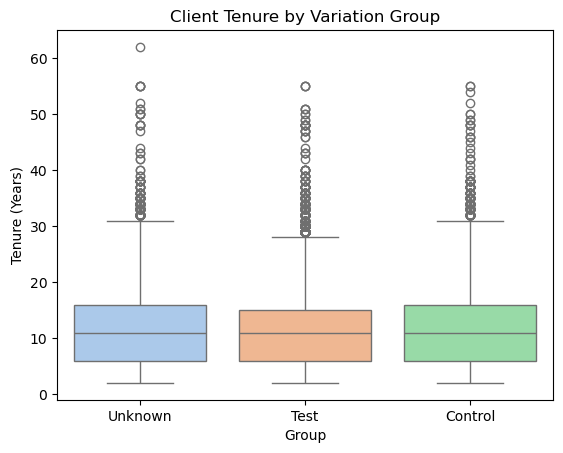

In [120]:
sns.boxplot(data=merged_df, x='Variation', y='clnt_tenure_yr', palette='pastel')
plt.title("Client Tenure by Variation Group")
plt.xlabel("Group")
plt.ylabel("Tenure (Years)")
plt.show()

In [122]:
#You might want to test if there are gender differences that affect engaging with the new or old process

from scipy.stats import chi2_contingency

# Step 1: Get one row per client with their group (Variation)
variation_df = df_web_ec[['client_id', 'Variation']].drop_duplicates()

# Step 2: Merge with df_demo to get gender
merged_df = pd.merge(variation_df, df_demo[['client_id', 'gendr']], on='client_id', how='inner')

# Step 3: Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(merged_df['gendr'], merged_df['Variation'])

# Step 4: Run the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 5: Display results
print("Contingency Table:\n", contingency_table)
print(f"\nChi-squared = {chi2:.2f}, P-value = {p:.4f}, Degrees of freedom = {dof}")

if p < 0.05:
    print("❗There is a significant association between gender and process variation assignment.")
else:
    print("✅ No significant association between gender and process variation assignment.")

Contingency Table:
 Variation  Control  Test  Unknown
gendr                            
F             7543  8716     6487
M             7970  8977     6777
U             8014  9266     6842
X                0     2        1

Chi-squared = 3.80, P-value = 0.7036, Degrees of freedom = 6
✅ No significant association between gender and process variation assignment.
